# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

---


Por: Ángela Daniela Córdoba Álvarez


---

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusión
conf_matriz = confusion_matrix(y_test, y_pred)
print(conf_matriz)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


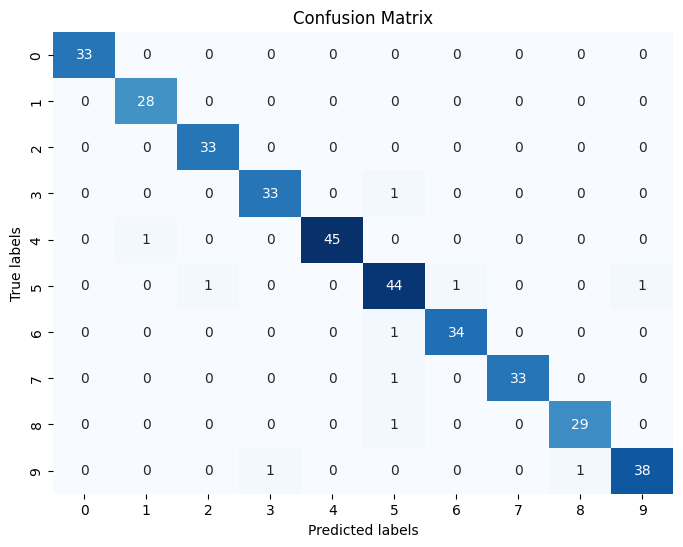

In [3]:
# Visualizando de forma más dinámica la matriz de confusión

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matriz, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

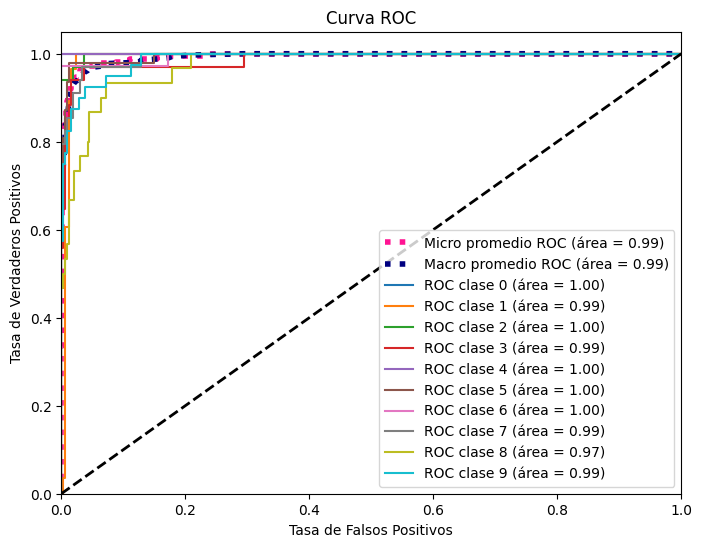

AUC Micro Promedio: 0.9935468106995884
AUC Macro Promedio: 0.9927700126038554


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

'''
Se usa el método de micro y macro promedio para calcular el AUC, ya que, por
ejemplo, el primero calcula las métricas agregando las contribuciones de todas
las clases antes de calcular la métrica final. Por otro lado, el segundo calcula
la métrica agregando las contribuciones de cada clase individualmente.
'''

# Calculando las probabilidades para la curva ROC
y_score = model.decision_function(X_test)

# Calculando la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(digits.target_names)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculando el micro promedio de ROC y AUC
y_test_one_hot = np.eye(len(digits.target_names))[y_test]

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calculando el macro promedio de ROC y AUC
# Se agregan todos los falsos positivos y verdaderos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(digits.target_names))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(digits.target_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Se promedia y calcula AUC
mean_tpr /= len(digits.target_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Visualizar
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label='Micro promedio ROC (área = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"], label='Macro promedio ROC (área = {0:0.2f})'.format(roc_auc["macro"]), color='navy', linestyle=':', linewidth=4)

for i in range(len(digits.target_names)):
    plt.plot(fpr[i], tpr[i], label='ROC clase {0} (área = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Mostrar AUC micro y macro promedio
print("AUC Micro Promedio:", roc_auc["micro"])
print("AUC Macro Promedio:", roc_auc["macro"])


## TAREA en clase/casa (reference - pumpkins homework):

Usando alguna herramienta de IA, consultar (dos versiones: para codificar "a mano" y con código python existente en bibliotecas):

1. Qué es y cómo se obtiene la matriz de confusíón.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.
3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.
4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.


**DESARROLLO:**

##### Información extraída de Copilot y ChatGPT.

1.   La matriz de confusión es una tabla que describe el rendimiento de un modelo de clasificación, describiendo cómo se distribuyen los valores reales y las predicciones. Se divide en cuatro categorías:
> * **Verdaderos positivos (TP):** Predicciones correctas de la clase positiva.
> * **Verdaderos negativos (TN):** Predicciones correctas de la clase negativa.
> * **Falsos positivos (FP):** Predicciones incorrectas de la clase positiva.
> * **Falsos negativos (FN):** Predicciones incorrectas de la clase negativa.

Esta matriz se obtiene comparando las etiquetas reales con las predicciones hechas por el modelo.


```
# En Python se obtiene como sigue:

from sklearn.metrics import confusion_matrix

# Supongamos que y_true son las etiquetas verdaderas e y_pred las predichas por el modelo
y_true = [...]
y_pred = [...]

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

```



2.   Analizando la matriz de confusión del código proporcionado al inicio de este notebook...

> * Cada fila representa las instancias en una clase verdaderas, mientras que las columan las representan en una clase ya predicha. Por otro lado, los valores de la diagonal son las predicciones **correctas** de cada clase; además, fuera de la diagonal, observamos que los valores son todos 0 y 1, por lo tanto, estos son los errores de predicción.


3.
> * $TP = C_{ii}$
> * $FP= \sum (C_{ji} - C{ii})$
> * $FN= \sum (C_{ij} - C{ii})$
> * $Precisión = \frac {TP}{TP+FP}$
> * $Recall = \frac {TP}{TP+FN}$
> * $F_1 - score = 2 \cdot \frac {Precision \cdot Recall}{Precision + Recall}$
> * $Support = TP + FN$

4. Las tres primeras métricas ayudan a entender cómo el modelo hace predicciones correctas e incorrectas de cada clase. La precisión indica la exactitud de las predicciones positivas. El recall indica si el modelo puede detectar instancias positivas. El F1-Score muestra la combinación entre la precisión y el recall para una sola métrica. El support proporciona info. sobre la distribución de las clases en el dataset de prueba.

5. Hecho al principio del notebook.

